In [5]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.0.3'

# <b>PART 1</b>

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
tb = pd.read_html(url)[0]
tb

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [6]:
tb['Borough'].replace('Not assigned',np.nan,inplace=True)
tb

,Postal Code,Borough,Neighborhood
0,M1A,NaN,Not assigned
1,M2A,NaN,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,NaN,Not assigned
176,M6Z,NaN,Not assigned
177,M7Z,NaN,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [7]:
df = tb.dropna(axis=0)
df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [11]:
df.sort_values(by='Postal Code')
df.head(15)

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


#### shape of our data

In [12]:
df.shape

(103, 3)

In [13]:
!conda install -c conda-forge geopy --yes 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

# <b>PART 2</b>

In [15]:
CLIENT_ID = '2V0KEG5AYTE1ZAKGAF1Y2NLW2Y21ASMWQT4C1TSOAL4AD0JO' # your Foursquare ID
CLIENT_SECRET = 'UJIMOQW3Y4KUUOSMUFVSOWBFYR5LNAUXJOCVEHPLMKT4WD3K' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
from geopy.geocoders import Nominatim

Your credentails:
CLIENT_ID: 2V0KEG5AYTE1ZAKGAF1Y2NLW2Y21ASMWQT4C1TSOAL4AD0JO
CLIENT_SECRET:UJIMOQW3Y4KUUOSMUFVSOWBFYR5LNAUXJOCVEHPLMKT4WD3K


In [16]:
# !wget -q -O 'tgd.csv' http://cocl.us/Geospatial_data
# g = Nominatim(user_agent="foursquare_agent")

df1 = pd.read_csv('tgd.csv')
df1.head()
# print('worked')

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Ran O(n^2) algo to fill df with latitude and longitude from given data

In [17]:
#df df1

df['Latitude'] = df['Postal Code']
df['Longitude']=df['Postal Code']

for i in df.index:
    for j in df1.index:
        if df['Postal Code'][i]==df1['Postal Code'][j]:
            df['Latitude'][i]=df1['Latitude'][j]
            df['Longitude'][i]=df1['Longitude'][j]
            break

df
    

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.7533,-79.3297
3,M4A,North York,Victoria Village,43.7259,-79.3156
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895
...,...,...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.6537,-79.5069
165,M4Y,Downtown Toronto,Church and Wellesley,43.6659,-79.3832
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.6627,-79.3216
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.6363,-79.4985


In [18]:
df.head(12)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.7533,-79.3297
3,M4A,North York,Victoria Village,43.7259,-79.3156
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.6679,-79.5322
9,M1B,Scarborough,"Malvern, Rouge",43.8067,-79.1944
11,M3B,North York,Don Mills,43.7459,-79.3522
12,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7064,-79.3099
13,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3789


# <b>PART 3</b>

### now we will do clustering and segmentation of toronta data in df data frame

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.7533,-79.3297
3,M4A,North York,Victoria Village,43.7259,-79.3156
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895


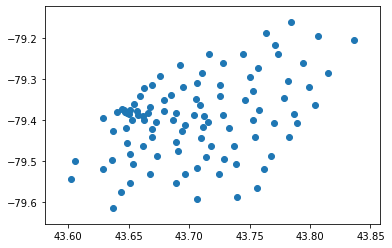

In [32]:
plt.scatter(df['Latitude'],df['Longitude'])

In [33]:
from sklearn.cluster import KMeans

In [34]:
Ks = 20

In [41]:
km = KMeans(n_clusters=3)
# x = df['Latitude']
# y = df['Longitude']
yhat = km.fit_predict(df[['Latitude','Longitude']])
# yhat = km.predict(x)
yhat

array([1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2], dtype=int32)

In [43]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# sc
sse=[]
for i in range(1,Ks):
    kk = KMeans(n_clusters=i)
    kk.fit_predict(df[['Latitude','Longitude']])
    sse.append(kk.inertia_)
sse    

[1.2433570196102182,
 0.6244927623699423,
 0.35617985033303123,
 0.2734603339116892,
 0.22318364626722376,
 0.18720071630203383,
 0.1539197788506385,
 0.13206287986555554,
 0.11613218250433051,
 0.10370842541697495,
 0.09042143083712295,
 0.08183746845708786,
 0.07783605004057484,
 0.06992360921162015,
 0.06334395139393283,
 0.06093874782417648,
 0.057797661401552555,
 0.051094824312101376,
 0.049056483947690056]

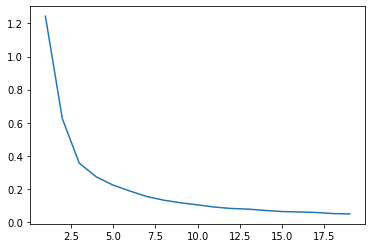

In [47]:
rn = range(1,Ks)
plt.plot(rn,sse)

### K = 3 is best

In [51]:
K= KMeans(n_clusters=3)
ks = K.fit_predict(df[['Latitude','Longitude']])
ks

array([0, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2], dtype=int32)

In [52]:
df['Cluster'] = ks

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df.head(20)

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster
2,M3A,North York,Parkwoods,43.7533,-79.3297,0
3,M4A,North York,Victoria Village,43.7259,-79.3156,0
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606,1
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648,2
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895,1
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.6679,-79.5322,2
9,M1B,Scarborough,"Malvern, Rouge",43.8067,-79.1944,0
11,M3B,North York,Don Mills,43.7459,-79.3522,1
12,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7064,-79.3099,0
13,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3789,1


## We added cluster column to our result , lets plot it too

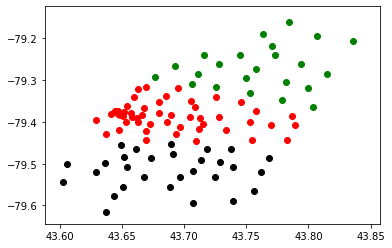

In [56]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.scatter(df1['Latitude'],df1['Longitude'],color='green')
plt.scatter(df2['Latitude'],df2['Longitude'],color='red')
plt.scatter(df3['Latitude'],df3['Longitude'],color='black')
plt.show()

### Above we can see best possible clustering using Kmeans